# import libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd

# import dataset

In [2]:
# import dataset
insurance_df = pd.read_csv('insurance.csv')

# make a copy of the original dataset
insurance = insurance_df.copy()

In [3]:
# initial look at the data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# basic info about the data
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# basisc statistical details about the data
insurance.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
#  basic statistical details about categorical columns
insurance.describe(include='O').transpose()

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [7]:
# list catagorical unique values
for col in insurance.select_dtypes(include='object'):
    print(f'{col} : {insurance[col].unique()}')

sex : ['female' 'male']
smoker : ['yes' 'no']
region : ['southwest' 'southeast' 'northwest' 'northeast']


# data cleaning

In [8]:
# check for missing values
insurance.isnull().sum()

# at this point, no furthre cleaning is required as there are no missing values or duplicates

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# data modeling

In [12]:
# split the data into features and target
X = insurance.drop('region', axis=1)
y = insurance['region']

In [13]:
# scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = ['age', 'bmi', 'children', 'charges']
X[num_cols] = scaler.fit_transform(X[num_cols])

# one hot encode categorical features
cata_cols = ['sex', 'smoker']
X = pd.get_dummies(X, columns=cata_cols, drop_first=True)


In [14]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# model training
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', random_state=42, C=1.0, gamma='scale', decision_function_shape='ovr')


In [17]:
# model fitting
svm_model.fit(X_train, y_train)

SVC(random_state=42)

# model prediction

In [18]:
# model prediction
y_pred = svm_model.predict(X_test)


# model evaluation

In [19]:
# model evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[10 18 20 17]
 [ 8 14 21 22]
 [ 9  4 44 16]
 [ 5 15 28 17]]

Classification Report:
               precision    recall  f1-score   support

   northeast       0.31      0.15      0.21        65
   northwest       0.27      0.22      0.24        65
   southeast       0.39      0.60      0.47        73
   southwest       0.24      0.26      0.25        65

    accuracy                           0.32       268
   macro avg       0.30      0.31      0.29       268
weighted avg       0.31      0.32      0.30       268


Accuracy Score: 0.31716417910447764


# feature importance

In [20]:
# feature importance is not directly available for SVM models, but we can use other techniques like permutation importance or SHAP values for interpretation.

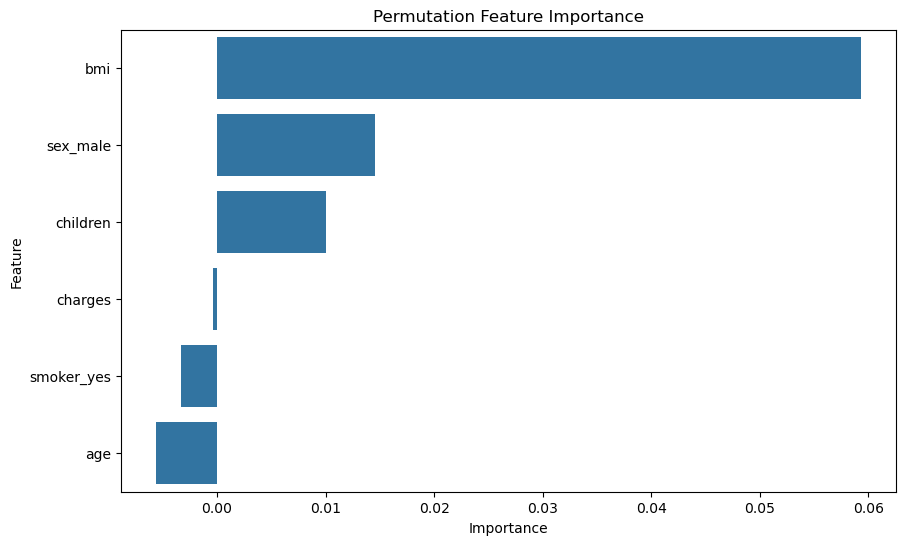

In [21]:
# pemutation importance 
from sklearn.inspection import permutation_importance
perm_importance = permutation_importance(svm_model, X_test, y_test, n_repeats=10, random_state=42)
import matplotlib.pyplot as plt
import seaborn as sns
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': perm_importance.importances_mean})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Permutation Feature Importance')
plt.show()

  0%|          | 0/268 [00:00<?, ?it/s]

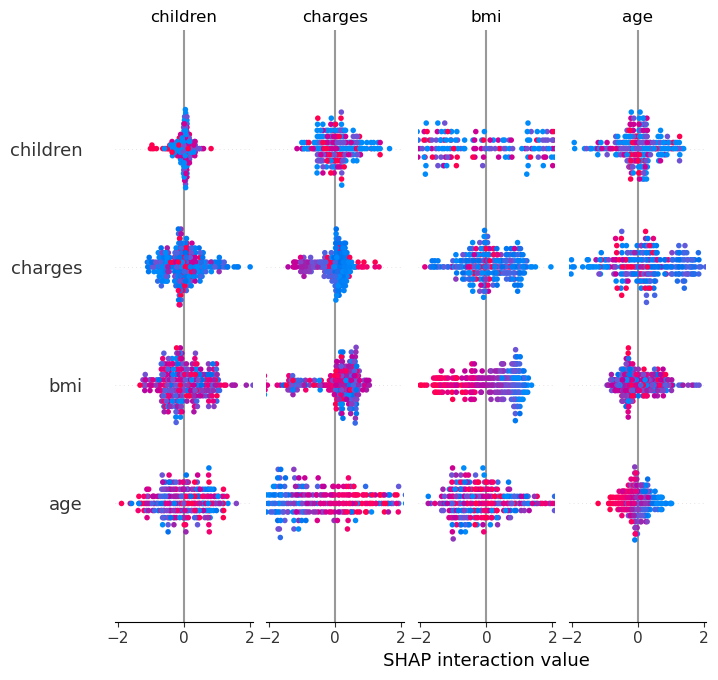

In [28]:
# SHAP values

explainer = shap.KernelExplainer(svm_model.decision_function, X_train.sample(n=100, random_state=42))
shap_values = explainer.shap_values(X_test, nsamples=100)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

